In [ ]:
!pip install qiskit

# Quantum Teleportation

Contrary to the name, quantum teleportation doesn't actually teleport a qubit physically, but instead teleports the information. Regardless of the distance between the qubits, the information will be reflected on the other qubit instantly, and without any medium required in between (thanks to entanglement).

Of course, this means that the required number of qubits already be present at the receiving end. Copying in the manner classical bits do is not possible, since that would measure the quantum state, effectively destroying the quantum state we're trying to copy.

suppose Alice wants to send a qubit to bob who is far away. before they move away they had entangled their qubits and now each has on of it. Now second qubit in our system is one of the entangled qubit that alice has. while the third qubit is second of the entangled qubit that bob has. While firsr qubit is the information we want to transfer to bob without knowing what it is.  

Here we will try to get make a qubit 1 in state |1> (information), and transfer it to qubit 3 which is far away. 
 
Since qubits start out in the `|0>` state, we'll `x` `q0` to make it a `|1>`.

In [ ]:
import qiskit
from qiskit.tools import visualization

circuit = qiskit.QuantumCircuit(3, 3)
circuit.x(0)
circuit.draw()



┌───┐
q_0: ┤ X ├
     └───┘
q_1: ─────
          
q_2: ─────
          
c: 3/═════

Now, we try to entangle qubit 2 and 3 as required. Since quantum teleportation requires that the qubits be entangled, we'll entangle `q1` and `q2`. To achive the entanglement form of $\frac{1}{2^{1/2}} (|00> + |11>)$ we will use CNot gate.


In [ ]:
circuit.barrier()
circuit.h(1)
circuit.cx(1, 2)
circuit.draw()

┌───┐ ░           
q_0: ┤ X ├─░───────────
     └───┘ ░ ┌───┐     
q_1: ──────░─┤ H ├──■──
           ░ └───┘┌─┴─┐
q_2: ──────░──────┤ X ├
           ░      └───┘
c: 3/══════════════════

According to the quantum teleportation protocol, we'll need to apply a controlled-NOT and Hadamard gate to `q0` and `q1`. as a part of the algorythm.

In [ ]:
circuit.cx(0, 1)
circuit.h(0)
circuit.draw()

┌───┐ ░                ┌───┐
q_0: ┤ X ├─░─────────────■──┤ H ├
     └───┘ ░ ┌───┐     ┌─┴─┐└───┘
q_1: ──────░─┤ H ├──■──┤ X ├─────
           ░ └───┘┌─┴─┐└───┘     
q_2: ──────░──────┤ X ├──────────
           ░      └───┘          
c: 3/════════════════════════════

Let's measure `q0` and `q1`.

In [ ]:
circuit.barrier()
circuit.measure([0, 1], [0, 1])
circuit.draw()

┌───┐ ░                ┌───┐ ░ ┌─┐   
q_0: ┤ X ├─░─────────────■──┤ H ├─░─┤M├───
     └───┘ ░ ┌───┐     ┌─┴─┐└───┘ ░ └╥┘┌─┐
q_1: ──────░─┤ H ├──■──┤ X ├──────░──╫─┤M├
           ░ └───┘┌─┴─┐└───┘      ░  ║ └╥┘
q_2: ──────░──────┤ X ├───────────░──╫──╫─
           ░      └───┘           ░  ║  ║ 
c: 3/════════════════════════════════╩══╩═
                                     0  1

At this point, we will get four outcomes from the measurement of the first two qubits which are,

{ $ |01> |0> , |11> |0> , |00> |1> , |10> |1> $ }. 

from the above set we can say that, first part tells us the outcome of the firsr two qubits while last part tells us the outcome of the third qubit. As we know the information is $|1>$, so last two sets gives the right answer while firsr two does not. also we can say that all four answer has equal probability. So to get the correct answer will 100% we will use cnot gate on two and three after the measurement. that will flip the qubit 3 in firsr two case. which is what we want. and that will give us the right answer with full certainty.

In [ ]:
circuit.barrier()
circuit.cx(1, 2)
#circuit.cz(0, 2)
circuit.draw()

┌───┐ ░                ┌───┐ ░ ┌─┐    ░      
q_0: ┤ X ├─░─────────────■──┤ H ├─░─┤M├────░──────
     └───┘ ░ ┌───┐     ┌─┴─┐└───┘ ░ └╥┘┌─┐ ░      
q_1: ──────░─┤ H ├──■──┤ X ├──────░──╫─┤M├─░───■──
           ░ └───┘┌─┴─┐└───┘      ░  ║ └╥┘ ░ ┌─┴─┐
q_2: ──────░──────┤ X ├───────────░──╫──╫──░─┤ X ├
           ░      └───┘           ░  ║  ║  ░ └───┘
c: 3/════════════════════════════════╩══╩═════════
                                     0  1

And now let's measure the final output.

In [ ]:
circuit.barrier()
circuit.measure(2, 2)
circuit.draw()

┌───┐ ░                ┌───┐ ░ ┌─┐    ░       ░    
q_0: ┤ X ├─░─────────────■──┤ H ├─░─┤M├────░───────░────
     └───┘ ░ ┌───┐     ┌─┴─┐└───┘ ░ └╥┘┌─┐ ░       ░    
q_1: ──────░─┤ H ├──■──┤ X ├──────░──╫─┤M├─░───■───░────
           ░ └───┘┌─┴─┐└───┘      ░  ║ └╥┘ ░ ┌─┴─┐ ░ ┌─┐
q_2: ──────░──────┤ X ├───────────░──╫──╫──░─┤ X ├─░─┤M├
           ░      └───┘           ░  ║  ║  ░ └───┘ ░ └╥┘
c: 3/════════════════════════════════╩══╩═════════════╩═
                                     0  1             2

Let's simulate and measure the circuit to verify that information was teleported from `q0` to `q2`.

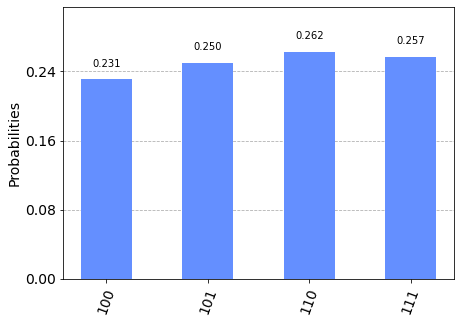

In [ ]:
result = qiskit.execute(circuit, backend=qiskit.Aer.get_backend('qasm_simulator'), shots=1024).result()
visualization.plot_histogram(result.get_counts())

As we can see last qubit which is at the bottom gives $|1>$ for all four answers when bob measures his qubit. and information is now transformed.